## Module 2: Lecture demo

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 18})
import numpy as np

### Function

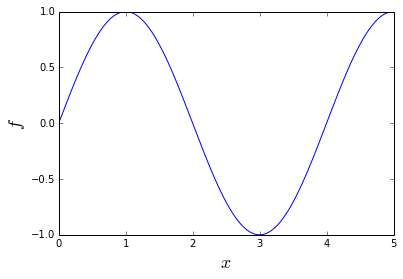

In [81]:
a, b = 0., 5.
n = 16
def f(x): return np.sin(np.pi*x/2.)

xx = np.linspace(a,b,1001)
plt.plot(xx, f(xx))
plt.xlabel(r'$x$'); plt.ylabel(r'$f$')

### Grid

In [70]:
def grid_uniform(n): return np.linspace(a, b, n+1)
def grid_chebychev(n):
    xi = np.cos( np.pi/(2*(n+1)) * (2*np.linspace(1, n+1, n+1) - 1) )
    return ((-xi + 1)/2) * (b-a) + a

### Basis

In [71]:
def basis_lagrange(x, grid):
    phi = np.ones(len(grid))
    for i, xi in enumerate(grid):
        for j,xj in enumerate(grid):
            if i != j: 
                phi[i] *= (x - xj) / (xi - xj)
    return phi

In [72]:
def plot_basis(basisfn, grid):
    xx = np.linspace(a, b, 101)
    phi = np.zeros((101, n+1))
    for i,x in enumerate(xx): 
        phi[i] = basisfn(x,grid)
    for j in range(n+1):
        plt.plot(xx, phi[:,j])
    plt.plot(grid, np.zeros(grid.shape), 'ok', label='samples')
    plt.xlabel(r'$x$'); plt.ylabel(r'$l_i$')

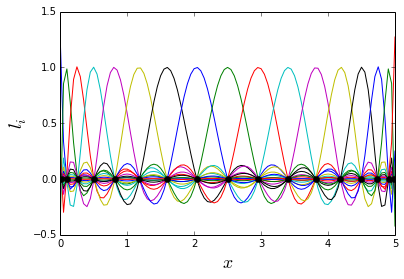

In [73]:
plot_basis(basis_lagrange, grid_chebychev(n))

### Interpolation

[[ 1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [-0.  1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.]
 [ 0. -0.  1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [-0.  0. -0.  1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.]
 [ 0. -0.  0. -0.  1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [-0.  0. -0.  0. -0.  1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.]
 [ 0. -0.  0. -0.  0. -0.  1.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.]
 [-0.  0. -0.  0. -0.  0. -0.  1.  0. -0.  0. -0.  0. -0.  0. -0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  1.  0. -0.  0. -0.  0. -0.  0. -0.]
 [-0.  0. -0.  0. -0.  0. -0.  0. -0.  1.  0. -0.  0. -0.  0. -0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  1.  0. -0.  0. -0.  0. -0.]
 [-0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  1.  0. -0.  0. -0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  1.  0. -0.  0. -0.]
 [-0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  1.  0. -0.  0.]
 [ 0. 

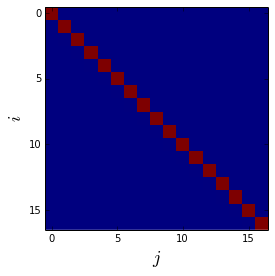

In [74]:
def interpolation_matrix(grid, basisfn):
    n = len(grid)-1
    A = np.zeros((n+1,n+1))
    for i in range(n+1):
        A[i,:] = basisfn(grid[i],grid)
    return A

A = interpolation_matrix(grid_chebychev(n), basis_lagrange)
print(A)
plt.imshow(A, interpolation='none')
plt.xlabel(r'$j$'); plt.ylabel(r'$i$')

In [75]:
def poly_interp(xx, f, grid, basis):
    A = interpolation_matrix(grid, basis)   ### Interpolation conditions
    ff = np.array([f(xi) for xi in grid])
    aa = np.linalg.solve(A,ff)
    basisxx = np.zeros((len(xx),len(grid))) ### Basis functions at all x values in xx
    for i,x in enumerate(xx):
        basisxx[i,:] = basis(x,grid)
    return np.dot(basisxx, aa)              ### Reconstruction

Usage is, for example:

In [ ]:
a, b = 0,5
f_test = f_runge
grid_test = grid_chebychev(30)
f_prediction = poly_interp(xx, f_test, grid_test, basis_lagrange)
plt.plot(xx, f_prediction)
plt.plot(xx, f_test(xx))
plt.plot(grid_test, f_test(grid_test), 'ok')
plt.xlabel(r'$x$'); plt.ylabel(r'$f$')

In [37]:
def f_sin(x): return np.sin(np.pi*x/2.)            # Sine-wave
def f_poly5(x): return 0.001*x**5 + 0.02*x**3 - x  # Polynomial
def f_step(x): return np.sign(x-2)                 # Discontinuous at x=2
def f_abs(x): return np.abs(x-2)                   # Discontinuous derivative at x=2
def f_abs3(x): return np.abs((x-2)**3)             # Discontinuous 3rd derivative at x=2
def f_runge(x): return 1./(1+(3*(x-2))**2)             # Infinitely differentiable (everywhere)
def f_gauss(x): return np.exp(-(3*(x-2))**2/2.)        # Very similar curve to above
def f_custom(x): pass                              # Your own function  

### Error

In [54]:
def error_max(xx, f, grid, basis):
    return np.max(np.abs(poly_interp(xx, f, grid, basis) - f(xx)))

In [55]:
def plot_convergence(f_fn, grid_fn, basis_fn):
    nn, linfty = range(2, 20), []
    xx = np.linspace(a, b, 1001)
    for n in nn:
        linfty.append(error_max(xx, f_fn, grid_fn(n), basis_fn))
    plt.plot(nn, np.log10(np.array(linfty)), '-o')

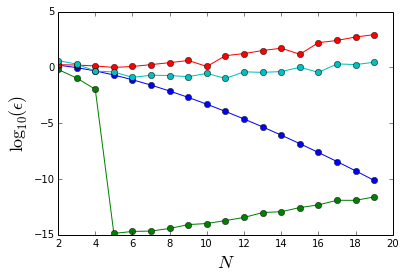

In [59]:
plot_convergence(f_sin, grid_uniform, basis_lagrange)
plot_convergence(f_poly5, grid_uniform, basis_lagrange)
plot_convergence(f_step, grid_uniform, basis_lagrange)
plot_convergence(f_abs3, grid_uniform, basis_lagrange)
plt.xlabel(r'$N$'); plt.ylabel(r'$\log_{10}(\epsilon)$')

### Nodal polynomial

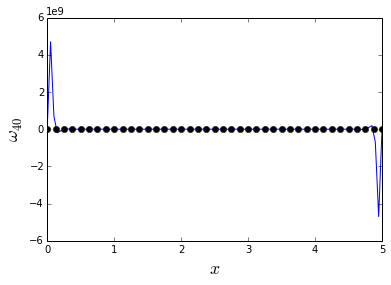

In [62]:
N = 40
grid_test = grid_uniform(N)
def nodalpoly(x, grid):
    phi = np.ones(len(x))
    for xi in grid:
        phi *= (x - xi)
    return phi

def plot_nodalpoly(grid):
    xx = np.linspace(a, b, 101)
    plt.plot(xx, nodalpoly(xx, grid))
    plt.plot(grid, np.zeros(grid.shape), 'ok', label='samples')
    plt.xlabel(r'$x$'); plt.ylabel(r'$\omega_{%d}$' % N)
    
plot_nodalpoly(grid_test)